# 数据准备

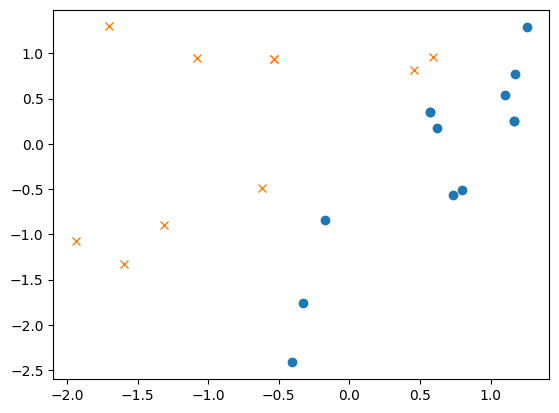

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读入训练数据
train = np.loadtxt('data/images2.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

# 初始化参数
theta = np.random.rand(3)

# 标准化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 增加x0
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

X = to_matrix(train_z)

# 数据可视化
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

# 预测函数的实现

In [2]:
def f(x):
    return 1/(1+np.exp(-np.dot(x, theta)))

# 重复训练

In [3]:
ETA = 1e-3

epoch = 5000

for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

# 画出决策边界

$\theta^Tx=0$

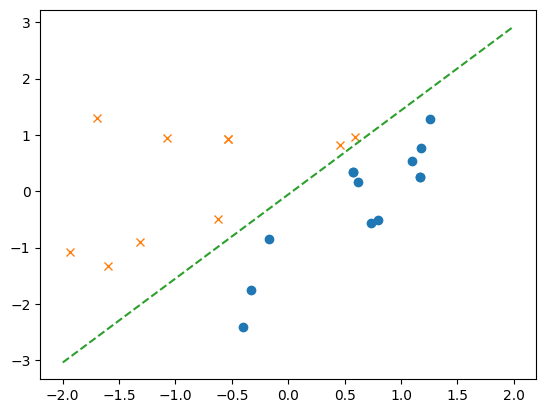

In [4]:
x0 = np.linspace(-2, 2, 100)

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1]*x0) / theta[2], linestyle='dashed')

plt.show()

# 验证

In [5]:
f(to_matrix(standardize([
    [200, 100],
    [100, 200]
])))

array([0.89599581, 0.02211448])

## 设定阈值

In [7]:
def classify(x):
    return (f(x) >= 0.5).astype(int)

classify(to_matrix(standardize([
    [200, 100],
    [100, 200]
])))

array([1, 0])